### **Import Data Set and libraries**

In [327]:
pip install ucimlrepo

In [328]:
import ucimlrepo
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [329]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
algerian_forest_fires = fetch_ucirepo(id=547)

# data (as pandas dataframes)
X = algerian_forest_fires.data.features
y = algerian_forest_fires.data.targets

# metadata
print(algerian_forest_fires.metadata)

# variable information
print(algerian_forest_fires.variables)


{'uci_id': 547, 'name': 'Algerian Forest Fires', 'repository_url': 'https://archive.ics.uci.edu/dataset/547/algerian+forest+fires+dataset', 'data_url': 'https://archive.ics.uci.edu/static/public/547/data.csv', 'abstract': 'The dataset includes 244 instances that regroup a data of two regions of Algeria.', 'area': 'Biology', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 244, 'num_features': 14, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Classes  '], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2019, 'last_updated': 'Tue Mar 19 2024', 'dataset_doi': '10.24432/C5KW4N', 'creators': [' Faroudja Abid'], 'intro_paper': {'title': ' Predicting Forest Fire in Algeria Using Data Mining Techniques: Case Study of the Decision Tree Algorithm', 'authors': 'Faroudja Abid, N.Izeboudjen', 'published_in': 'Ezziyyani M. (eds) Advanced Intelligent Systems for Sustainable Devel

In [330]:
X.isna().sum()

,0
region,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0


In [331]:
y.isna().sum()

,0
Classes,1


In [332]:
df = pd.concat([X, y], axis=1)

In [333]:
df.head()

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,Bejaia,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,Bejaia,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,Bejaia,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,Bejaia,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0,not fire
4,Bejaia,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire


### **Feature Engineering**

In [334]:
df.isna().sum()

,0
region,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0


In [335]:
df.loc[[120,121,122]]

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
120,Bejaia,29,9,2012,26,80,16,1.8,47.4,2.9,7.7,0.3,3.0,0.1,not fire
121,Bejaia,30,9,2012,25,78,14,1.4,45.0,1.9,7.5,0.2,2.4,0.1,not fire
122,Sidi-Bel Abbes,1,6,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire


In [336]:
df.iloc[:121,df.columns.get_loc('region')]=0
df.iloc[121:,df.columns.get_loc('region')]=1
#df.iloc[242:,df.column.get_loc('region')]=2

In [337]:
df.isna().sum()

,0
region,0
day,0
month,0
year,0
Temperature,0
RH,0
Ws,0
Rain,0
FFMC,0
DMC,0


In [338]:
df.dropna(inplace=True)

In [339]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 243 entries, 0 to 243
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   region       243 non-null    object 
 1   day          243 non-null    int64  
 2   month        243 non-null    int64  
 3   year         243 non-null    int64  
 4   Temperature  243 non-null    int64  
 5    RH          243 non-null    int64  
 6    Ws          243 non-null    int64  
 7   Rain         243 non-null    float64
 8   FFMC         243 non-null    float64
 9   DMC          243 non-null    float64
 10  DC           243 non-null    object 
 11  ISI          243 non-null    float64
 12  BUI          243 non-null    float64
 13  FWI          243 non-null    object 
 14  Classes      243 non-null    object 
dtypes: float64(5), int64(6), object(4)
memory usage: 30.4+ KB


In [340]:
df["region"]=df["region"].astype(int)

In [341]:
df.columns

Index(['region', 'day', 'month', 'year', 'Temperature', ' RH', ' Ws', 'Rain ',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes  '],
      dtype='object')

In [342]:
df.columns = df.columns.str.strip()

In [343]:
df.columns

Index(['region', 'day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain',
       'FFMC', 'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes'],
      dtype='object')

In [344]:
objectFeatures  = [feature for feature in df.columns if df[feature].dtype=='O']

In [345]:
for feature in objectFeatures:
    if feature!='Classes':
      df[feature]=df[feature].astype(float)

### **Exploratory Data Analysis**

In [272]:
df_copy = df.drop(['day','month','year'],axis=1).copy()

In [273]:
df_copy['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


In [274]:
# Encode the categories in classes
df1 = df_copy.copy()
df1['Classes'] = df1['Classes'].astype(str)
df1['Classes'] = df1['Classes'].str.strip().map({'fire':1,'not fire':0,np.nan:0})
df1['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [275]:
df2 = df_copy.copy()
df2['Classes'] = df2['Classes'].astype(str)
df2['Classes'] = np.where(df2['Classes'].str.contains('not'),0,1)
df2['Classes'].value_counts()

,count
Classes,
1,137
0,106


In [204]:
df['Classes'].value_counts()

,count
Classes,
fire,131
not fire,101
fire,4
fire,2
not fire,2
not fire,1
not fire,1
not fire,1


<ipython-input-277-8364d436c8aa>:2: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


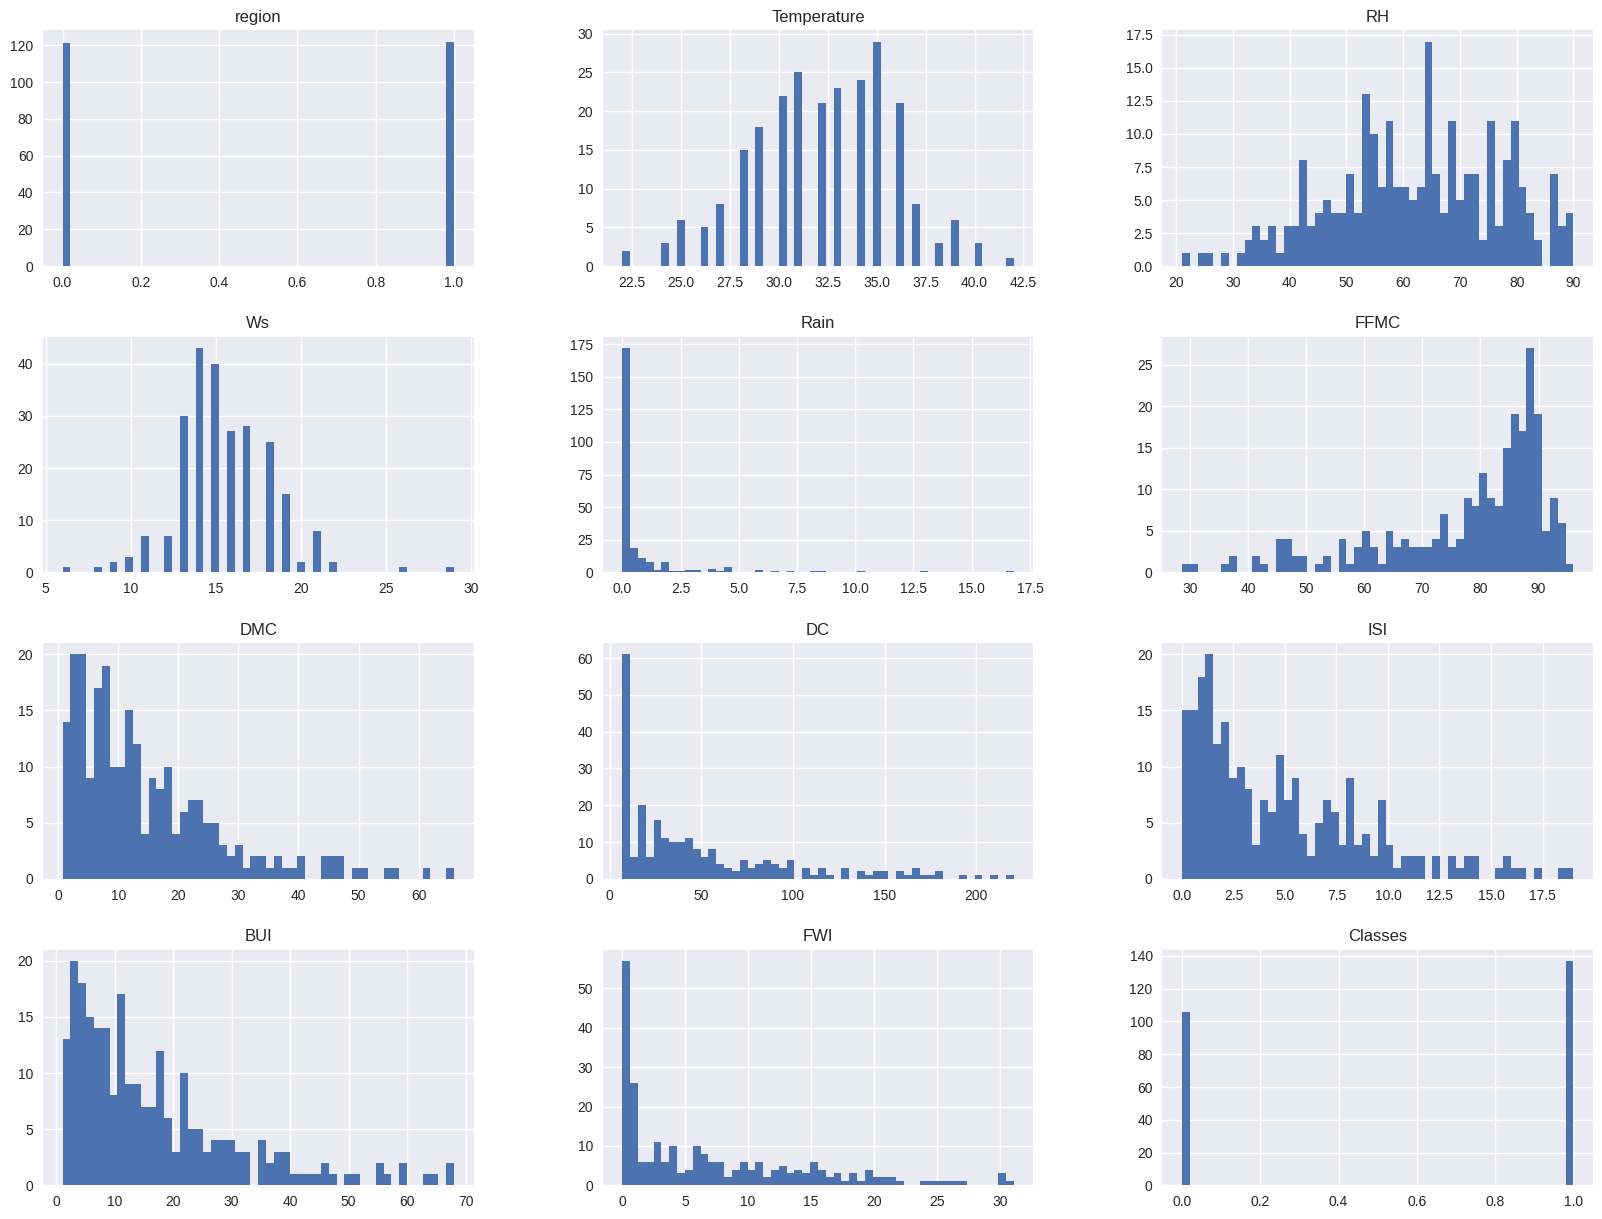

In [277]:
# Density for all features
plt.style.use('seaborn')
df2.hist(bins=50,figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Percentage of Classes')

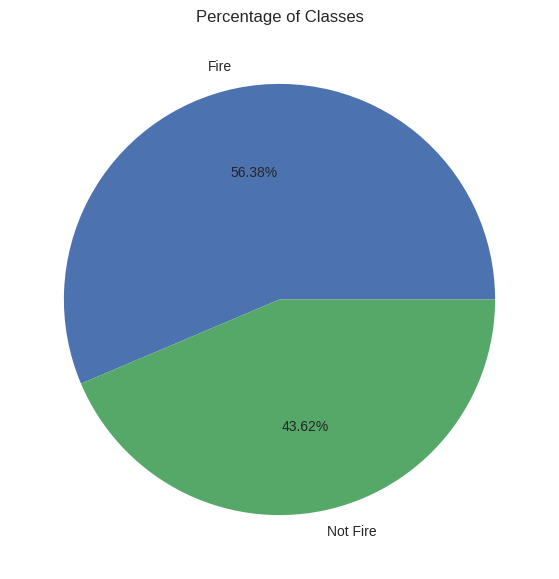

In [281]:
# Percentage for the pie chart
percentage = df2['Classes'].value_counts(normalize=True)
classLabels = ['Fire','Not Fire']
plt.figure(figsize=(12,7))
plt.pie(percentage,labels=classLabels,autopct='%1.2f%%')
plt.title('Percentage of Classes')

In [282]:
# Correlation
df2.corr()

,region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
region,1.000000,0.253296,-0.393805,-0.185542,-0.037390,0.203364,0.183583,-0.085989,0.254179,0.081125,0.189415,0.152990
Temperature,0.253296,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015
RH,-0.393805,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161
Ws,-0.185542,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964
Rain,-0.037390,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097
FFMC,0.203364,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492
DMC,0.183583,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658
DC,-0.085989,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123
ISI,0.254179,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197
BUI,0.081125,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639


<Axes: >

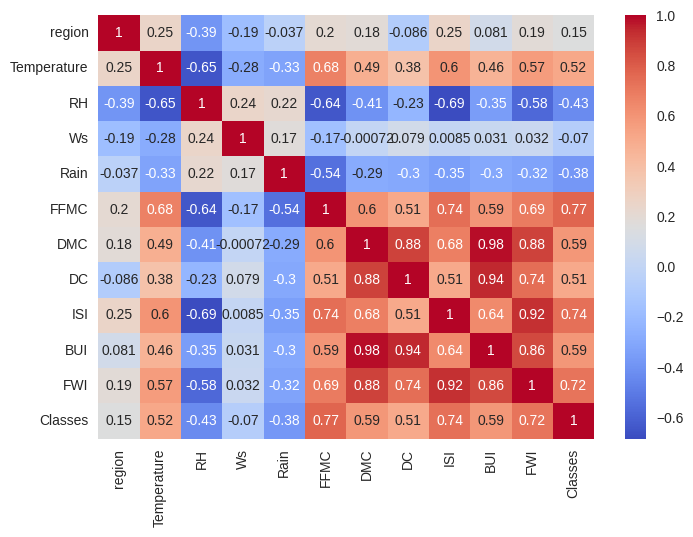

In [284]:
sns.heatmap(df2.corr(),annot=True,cmap='coolwarm')

<Axes: ylabel='FWI'>

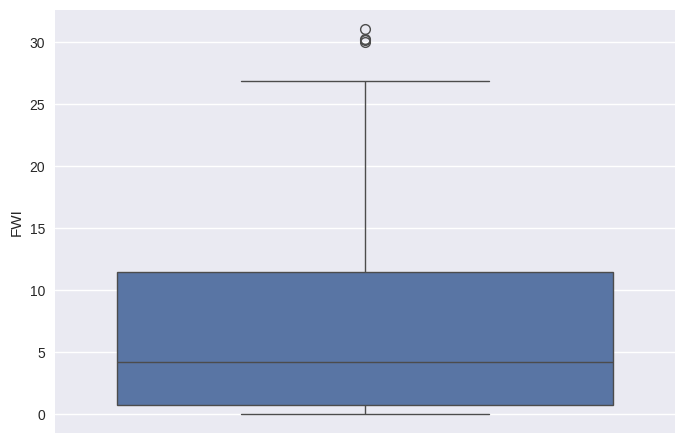

In [286]:
## Box plots
sns.boxplot(df2['FWI'])

In [346]:
df['Classes'] = np.where(df['Classes'].str.contains('not'),'not fire','fire')

Text(0, 0.5, 'Number of Fires')

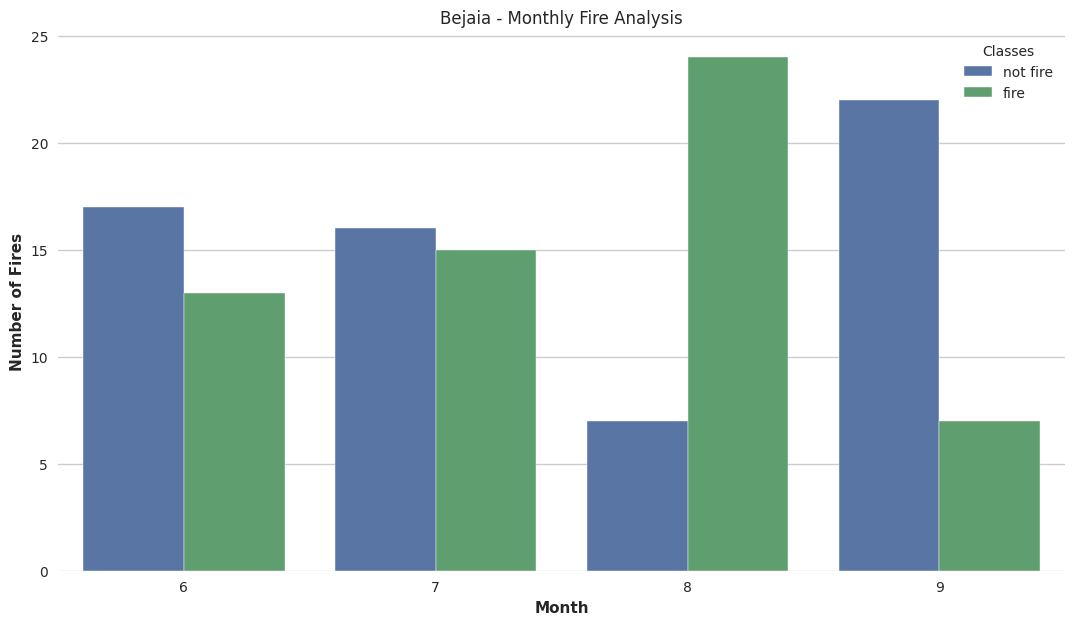

In [347]:
# Monthly fire analysis
dfTemp = df.loc[df['region']==0]
plt.subplots(figsize=(13,7))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dfTemp)
plt.title('Bejaia - Monthly Fire Analysis')
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of Fires',weight='bold')

Text(0, 0.5, 'Number of Fires')

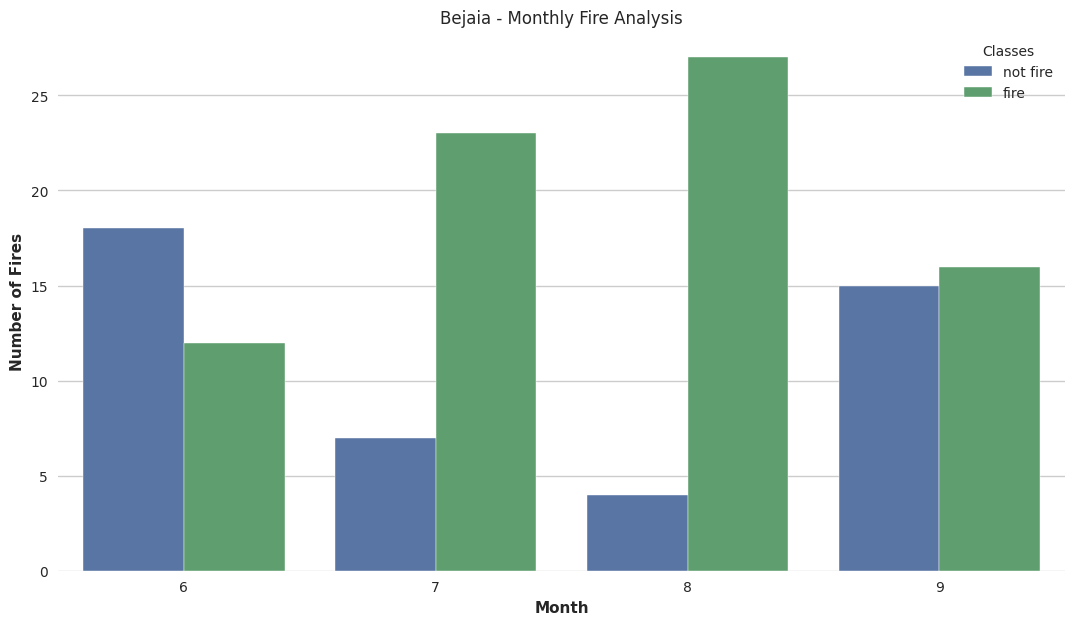

In [348]:
# Monthly fire analysis
dfTemp = df.loc[df['region']==1 ]
plt.subplots(figsize=(13,7))
sns.set_style('whitegrid')
sns.countplot(x='month',hue='Classes',data=dfTemp)
plt.title('Bejaia - Monthly Fire Analysis')
plt.xlabel('Month',weight='bold')
plt.ylabel('Number of Fires',weight='bold')

August has most fire incidents records

### **Model Split**

In [350]:
df

,region,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,0,1,6,2012,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,0,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire
2,0,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,0,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire
4,0,5,6,2012,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239,1,26,9,2012,30,65,14,0.0,85.4,16.0,44.5,4.5,16.9,6.5,fire
240,1,27,9,2012,28,87,15,4.4,41.1,6.5,8.0,0.1,6.2,0.0,not fire
241,1,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire
242,1,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire


In [352]:
df.drop(['day','month','year'],axis=1,inplace=True)

In [353]:
df['Classes'].value_counts()

,count
Classes,
fire,137
not fire,106


In [361]:
df['Classes'] = np.where(df['Classes'].str.contains('not'),0,1)
X=df.drop('FWI',axis=1)
y=df['FWI']

In [362]:
# Train Test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=40)

In [363]:
X_train.shape,X_test.shape

((182, 11), (61, 11))

In [364]:
# Feature selection
X_train.corr()

,region,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes
region,1.000000,0.223795,-0.390832,-0.137189,-0.043905,0.206310,0.169910,-0.093126,0.293776,0.064223,0.195667
Temperature,0.223795,1.000000,-0.670895,-0.309967,-0.323933,0.678800,0.510329,0.409550,0.631343,0.484508,0.542602
RH,-0.390832,-0.670895,1.000000,0.242079,0.250252,-0.703033,-0.424401,-0.240701,-0.741406,-0.364836,-0.520424
Ws,-0.137189,-0.309967,0.242079,1.000000,0.272414,-0.227417,-0.007541,0.056127,-0.029194,0.019347,-0.129204
Rain,-0.043905,-0.323933,0.250252,0.272414,1.000000,-0.511986,-0.291812,-0.300094,-0.339451,-0.300894,-0.378860
FFMC,0.206310,0.678800,-0.703033,-0.227417,-0.511986,1.000000,0.625271,0.523760,0.750848,0.609133,0.798691
DMC,0.169910,0.510329,-0.424401,-0.007541,-0.291812,0.625271,1.000000,0.887003,0.666945,0.982374,0.599226
DC,-0.093126,0.409550,-0.240701,0.056127,-0.300094,0.523760,0.887003,1.000000,0.483607,0.947206,0.508630
ISI,0.293776,0.631343,-0.741406,-0.029194,-0.339451,0.750848,0.666945,0.483607,1.000000,0.623279,0.744079
BUI,0.064223,0.484508,-0.364836,0.019347,-0.300894,0.609133,0.982374,0.947206,0.623279,1.000000,0.594729


<Axes: >

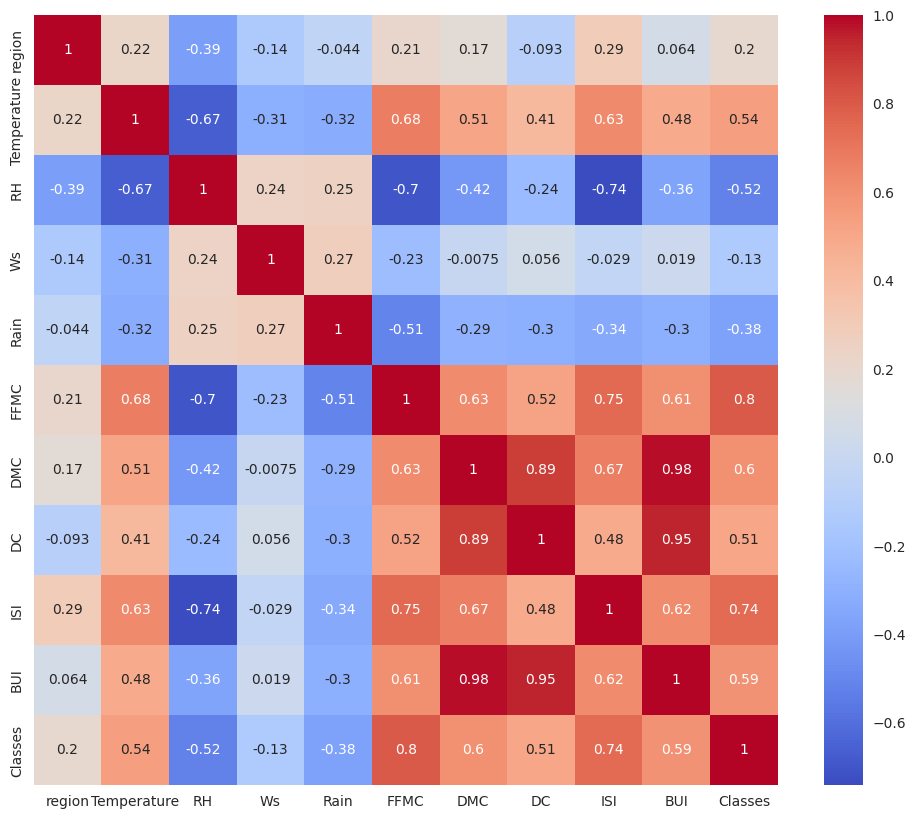

In [365]:
# Check for multi-co-linearity
plt.figure(figsize=(12,10))
corr=X_train.corr()
sns.heatmap(corr,annot=True,cmap='coolwarm')

In [366]:
def correlation(dataset,threshold):
  col_corr = set()
  corr_matrix = dataset.corr()
  for i in range (len(corr_matrix.columns)):
    for j in range(i):
      if abs(corr_matrix.iloc[i,j])>threshold:
        colname = corr_matrix.columns[i]
        col_corr.add(colname)
  return col_corr

In [371]:
# Threshold generally is set by domain expert
corr_features = correlation(X_train,0.85)

In [374]:
# Drop features when corr is more than threshold
X_train.drop(corr_features,axis=1,inplace=True)
X_test.drop(corr_features,axis=1,inplace=True)
X_train.shape,X_test.shape

((182, 9), (61, 9))

### **Feature Scaling/Standardisation**

In [377]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test)

In [378]:
X_train_scaled

array([[ 1.06825862,  1.39492742, -1.67155938, ...,  1.00121787,
         1.57247507,  0.89553347],
       [ 1.06825862, -0.84433865,  1.63881938, ..., -0.84459293,
        -1.05082345, -1.11665285],
       [ 1.06825862, -0.28452213,  0.57949817, ...,  2.55811915,
         0.47753308,  0.89553347],
       ...,
       [-0.93610291, -0.56443039,  0.71191332, ..., -0.21059705,
         0.18098629,  0.89553347],
       [ 1.06825862, -0.28452213, -0.01637   , ..., -0.7161887 ,
        -0.22961696,  0.89553347],
       [-0.93610291,  0.8351109 , -0.47982303, ...,  0.31104514,
         0.59158954,  0.89553347]])

In [379]:
X_test_scaled

array([[-9.36102911e-01,  2.75294386e-01, -8.10860907e-01,
        -5.40610949e-01, -3.83653460e-01,  7.74800065e-01,
         6.56131502e-01,  5.45966954e-01,  8.95533471e-01],
       [ 1.06825862e+00,  1.11501916e+00, -1.63700049e-02,
         1.57198929e-01, -3.83653460e-01,  7.14726103e-01,
         1.42514584e-01,  5.00344371e-01,  8.95533471e-01],
       [ 1.06825862e+00,  1.67483568e+00, -6.78445757e-01,
        -5.40610949e-01, -3.83653460e-01,  8.06120677e-02,
        -8.28542401e-01, -6.40220202e-01, -1.11665285e+00],
       [-9.36102911e-01, -8.44338647e-01,  5.13290597e-01,
        -5.40610949e-01, -3.83653460e-01,  3.80981874e-01,
        -4.27279184e-01, -3.66484704e-01,  8.95533471e-01],
       [ 1.06825862e+00, -1.12424690e+00,  3.14667871e-01,
         1.20391375e+00, -3.83653460e-01, -1.12959585e-01,
        -9.48921366e-01, -6.40220202e-01, -1.11665285e+00],
       [ 1.06825862e+00,  5.55202644e-01, -4.13615456e-01,
        -1.91706010e-01,  1.01380890e+00, -1.530088

<ipython-input-381-ea107f3a79a4>:3: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(1,2,1)


Text(0.5, 1.0, 'X_train after scaling')

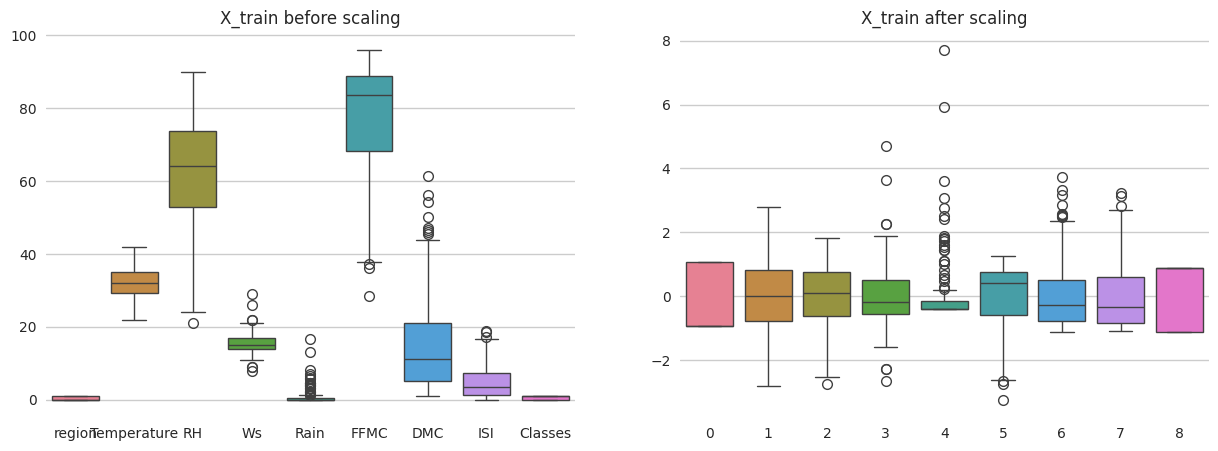

In [381]:
# Lets check out how does outlier look now
plt.subplots(figsize=(15,5))
plt.subplot(1,2,1)
sns.boxplot(data=X_train)
plt.title('X_train before scaling')
plt.subplot(1,2,2)
sns.boxplot(X_train_scaled)
plt.title('X_train after scaling')

### **Linear Regression Model**

In [410]:
from sklearn.linear_model import LinearRegression,Lasso,Ridge,HuberRegressor,ElasticNet
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error,accuracy_score,confusion_matrix,classification_report

In [398]:
def graphPlotter(y_test,y_pred,model):
  plt.scatter(y_test,y_pred)
  plt.xlabel('Actual')
  plt.ylabel('Predicted')
  plt.title('Actual vs Predicted : '+model)

In [399]:
linReg = LinearRegression()
linReg.fit(X_train_scaled,y_train)
y_pred = linReg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2Score)

Mean Absolute Error: 0.5470551795358154
R2 Score: 0.98818211534487


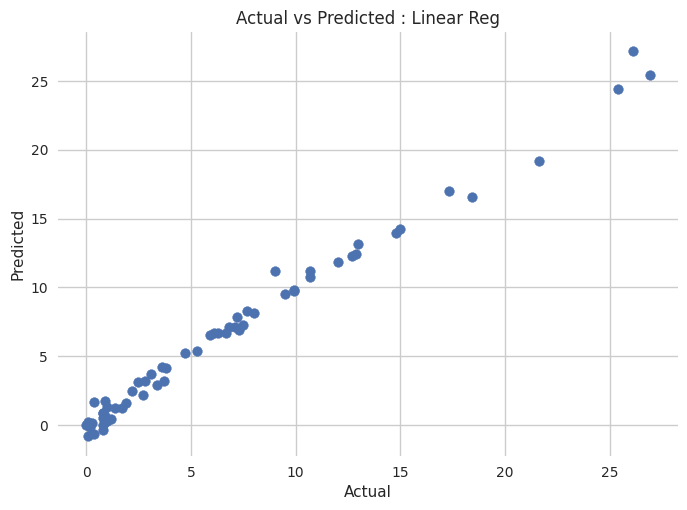

In [400]:
graphPlotter(y_test,y_pred,'Linear Reg')

### **Lasso Regression**

In [414]:
lassoReg = Lasso()
lassoReg.fit(X_train_scaled,y_train)
y_pred = lassoReg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2Score)

Mean Absolute Error: 1.1980294364355122
R2 Score: 0.9495910774123502


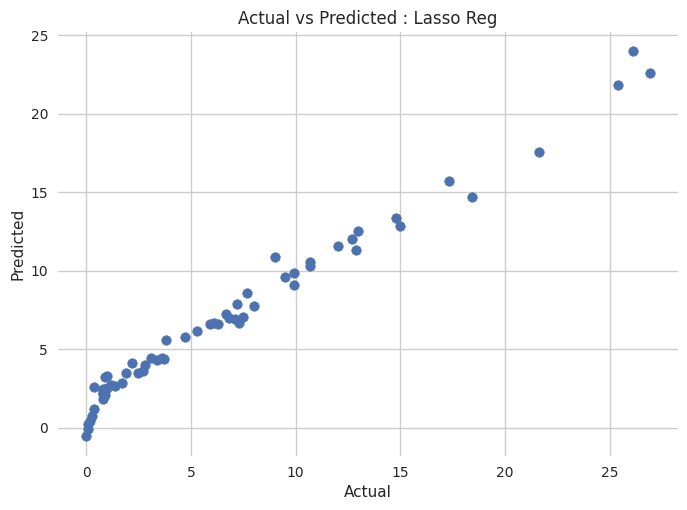

In [415]:
graphPlotter(y_test,y_pred,'Lasso Reg')

#### **Cross Validate - Lasso**

In [417]:
from sklearn.linear_model import LassoCV
lassoCv = LassoCV(cv=5)
lassoCv.fit(X_train_scaled,y_train)

LassoCV(cv=5)

In [418]:
lassoCv.predict(X_test_scaled)

array([ 1.22843855e+01,  9.64436379e+00,  3.13880459e-01,  4.21589266e+00,
        4.72211785e-03,  7.84674986e-01,  3.42286336e+00,  7.20529207e+00,
        1.23779927e+01,  6.82133332e+00,  1.13674937e+01,  1.60017054e+00,
        4.46317284e+00,  2.69724608e+01,  8.10362815e+00,  9.85066610e-01,
        1.69714420e+01,  1.07183254e+01,  1.19616859e+01,  6.37129912e+00,
        7.66135575e+00, -1.03128159e+00,  5.14812474e+00,  6.79381258e+00,
        2.58013658e+00,  9.24773072e-01,  1.31959152e+01,  8.53068917e+00,
        1.45824419e+00,  6.87979350e+00, -3.25663019e-01,  9.92044699e+00,
        3.61137645e+00,  5.98054788e-01,  7.14325251e+00,  7.19836499e-01,
        9.88345707e-01,  3.08380551e+00,  1.70123092e+00,  1.12380198e+01,
        1.89421833e+00,  2.52030537e+01,  5.55169286e+00,  2.65114928e+00,
        6.76336546e+00,  3.48360723e+00,  7.27436717e+00,  1.01758230e+00,
        1.41269379e+01,  1.64301218e+01,  2.43116177e+01,  3.90462162e-02,
        1.93935822e+00,  

In [419]:
lassoCv.alphas_

array([6.99828963, 6.52662833, 6.08675543, 5.67652848, 5.29394946,
       4.93715499, 4.60440726, 4.29408562, 4.00467862, 3.73477669,
       3.48306524, 3.2483183 , 3.02939252, 2.8252216 , 2.63481112,
       2.45723367, 2.29162434, 2.13717653, 1.99313799, 1.85880716,
       1.73352978, 1.61669567, 1.50773579, 1.40611945, 1.3113517 ,
       1.22297099, 1.14054684, 1.0636778 , 0.99198947, 0.9251327 ,
       0.86278186, 0.80463325, 0.75040366, 0.69982896, 0.65266283,
       0.60867554, 0.56765285, 0.52939495, 0.4937155 , 0.46044073,
       0.42940856, 0.40046786, 0.37347767, 0.34830652, 0.32483183,
       0.30293925, 0.28252216, 0.26348111, 0.24572337, 0.22916243,
       0.21371765, 0.1993138 , 0.18588072, 0.17335298, 0.16166957,
       0.15077358, 0.14061194, 0.13113517, 0.1222971 , 0.11405468,
       0.10636778, 0.09919895, 0.09251327, 0.08627819, 0.08046332,
       0.07504037, 0.0699829 , 0.06526628, 0.06086755, 0.05676528,
       0.05293949, 0.04937155, 0.04604407, 0.04294086, 0.04004

In [421]:
lassoCv.mse_path_.shape

(100, 5)

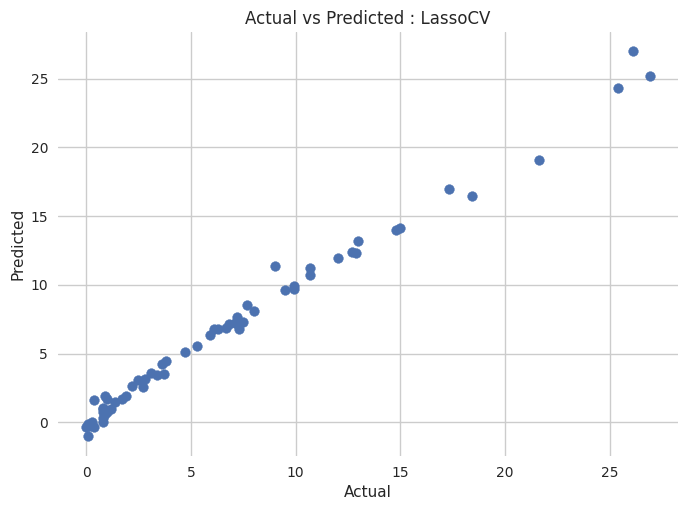

In [422]:
y_pred=lassoCv.predict(X_test_scaled)
graphPlotter(y_test,y_pred,'LassoCV')

In [423]:
mae = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2Score)

Mean Absolute Error: 0.5232419261736915
R2 Score: 0.9879980663121679


### **Ridge Regression**

In [429]:
ridgeReg = Ridge()
ridgeReg.fit(X_train_scaled,y_train)
y_pred = ridgeReg.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2Score)

Mean Absolute Error: 0.5584952641880934
R2 Score: 0.9877429170758187


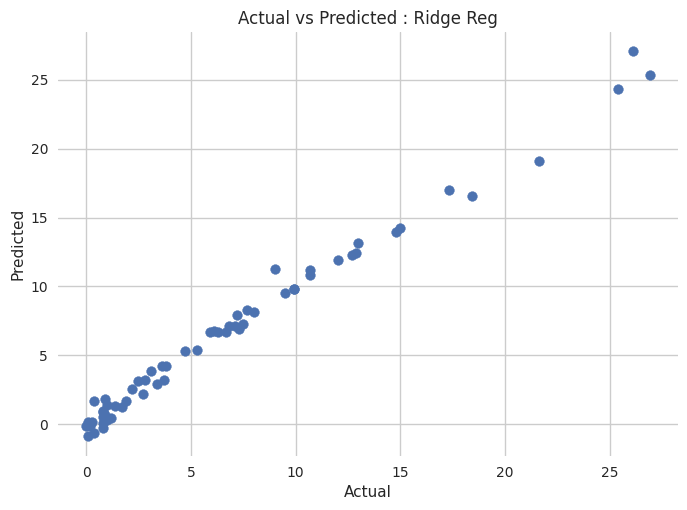

In [430]:
graphPlotter(y_test,y_pred,'Ridge Reg')

In [434]:
from sklearn.linear_model import RidgeCV
ridgeCv = RidgeCV(cv=5)
ridgeCv.fit(X_train_scaled,y_train)
y_pred = ridgeCv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2Score)

Mean Absolute Error: 0.5584952641880934
R2 Score: 0.9877429170758187


In [433]:
ridgeCv.alphas

(0.1, 1.0, 10.0)

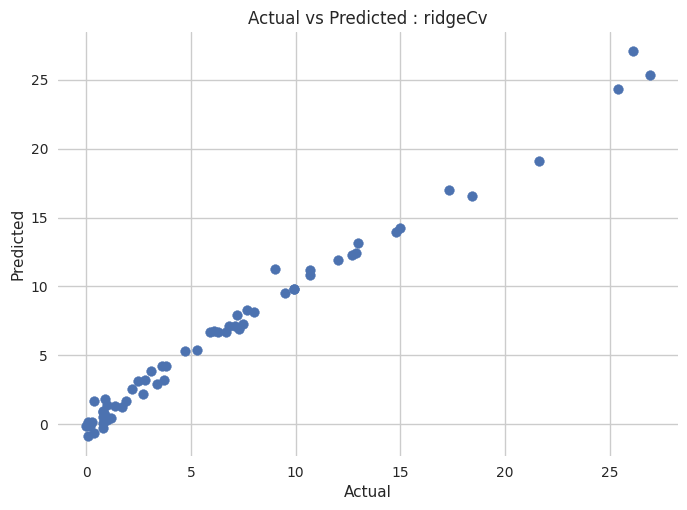

In [432]:
graphPlotter(y_test,y_pred,'ridgeCv')

### **ElasticNet**

In [411]:
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaled,y_train)
y_pred = elasticNet.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2Score)

Mean Absolute Error: 1.89581253424809
R2 Score: 0.8726780215312424


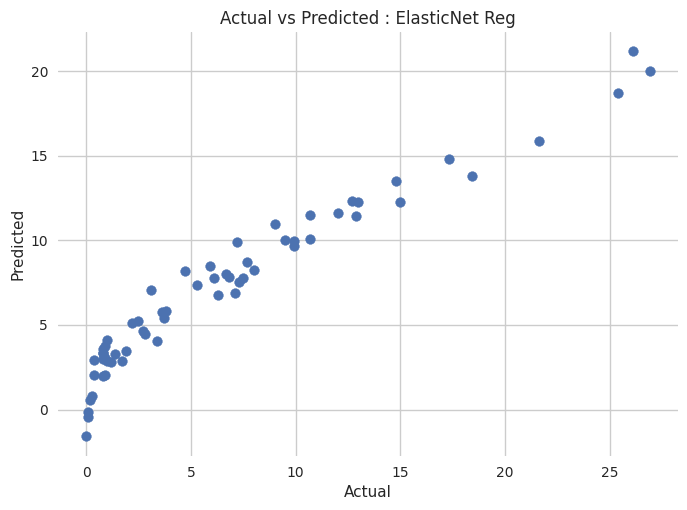

In [412]:
graphPlotter(y_test,y_pred,'ElasticNet Reg')

In [435]:
from sklearn.linear_model import ElasticNetCV
elasticNetCv = ElasticNetCV()
elasticNetCv.fit(X_train_scaled,y_train)
y_pred = elasticNetCv.predict(X_test_scaled)
mae = mean_absolute_error(y_test,y_pred)
r2Score = r2_score(y_test,y_pred)
print('Mean Absolute Error:',mae)
print('R2 Score:',r2Score)

Mean Absolute Error: 0.5907561483898652
R2 Score: 0.9860350380747132


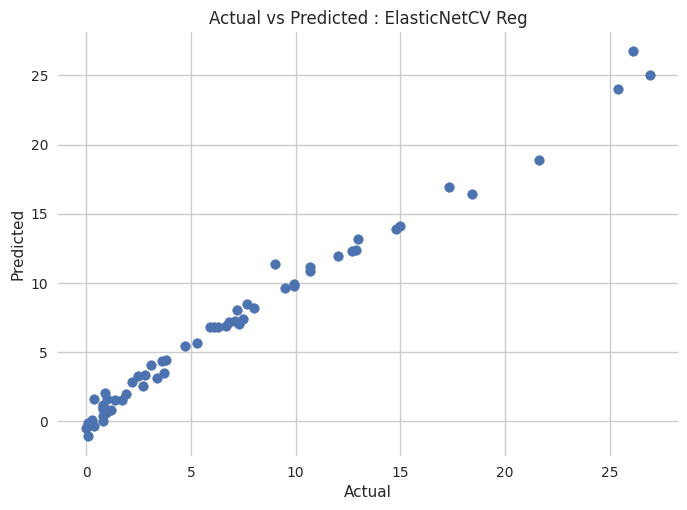

In [436]:
graphPlotter(y_test,y_pred,'ElasticNetCV Reg')

In [437]:
elasticNetCv.alphas_

array([13.99657926, 13.05325666, 12.17351085, 11.35305696, 10.58789892,
        9.87430997,  9.20881453,  8.58817125,  8.00935725,  7.46955338,
        6.96613048,  6.4966366 ,  6.05878504,  5.6504432 ,  5.26962224,
        4.91446734,  4.58324869,  4.27435307,  3.98627598,  3.71761432,
        3.46705955,  3.23339134,  3.01547159,  2.8122389 ,  2.62270341,
        2.44594198,  2.28109367,  2.12735559,  1.98397895,  1.85026541,
        1.72556371,  1.60926649,  1.50080732,  1.39965793,  1.30532567,
        1.21735109,  1.1353057 ,  1.05878989,  0.987431  ,  0.92088145,
        0.85881712,  0.80093572,  0.74695534,  0.69661305,  0.64966366,
        0.6058785 ,  0.56504432,  0.52696222,  0.49144673,  0.45832487,
        0.42743531,  0.3986276 ,  0.37176143,  0.34670596,  0.32333913,
        0.30154716,  0.28122389,  0.26227034,  0.2445942 ,  0.22810937,
        0.21273556,  0.19839789,  0.18502654,  0.17255637,  0.16092665,
        0.15008073,  0.13996579,  0.13053257,  0.12173511,  0.11